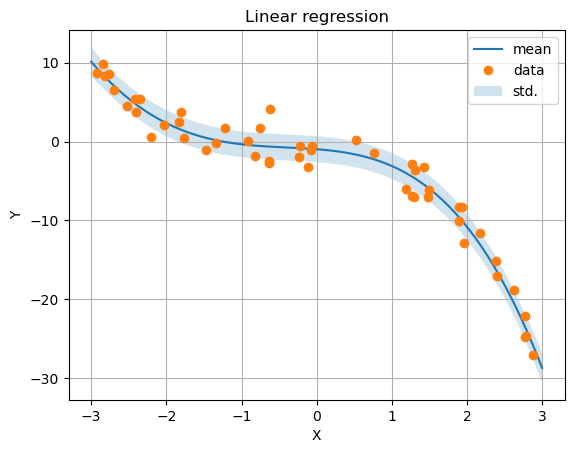

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [154]:
# ベクトル作成関数
function x_vector(xₙ, M)
    xₙₘ = zeros(length(xₙ), M)
    for m in 1:M
        xₙₘ[:,m] = xₙ.^(m-1)
    end
    xₙₘ
end

# 確認
#x_vector(1:5, 4)


###　真のモデルを設定

M_truth = 4
W_truth = rand(-1:0.1:1, 4)

# 真の入力値
X_line = range(-3, 3, length=200)
X_truth = x_vector(X_line, M_truth)

# 真の出力値
Y_line = X_truth*W_truth


###　観測データを生成
N = 50
xₙ = rand(minimum(X_line):0.01:maximum(X_line), N)
xₙₘ_truth = x_vector(xₙ, M_truth)

# ノイズ成分のパラメータ設定
using Distributions
λ = 0.4
ϵ = rand(Normal(0,√inv(λ)),　N)　# 平均0ガウス分布

# 観測データの出力値
yₙ = xₙₘ_truth*W_truth + ϵ


# 真のモデルと観測データの作図
#using Plots
#plot(X_line, Y_line, label="Y_true")
#scatter!(xₙ, yₙ, label="Y_obs")


### ベイズ推論による線形回帰

# 事前分布の設定
using LinearAlgebra
M = 5
m = zeros(M)
σ = Matrix{Float64}(I, M, M) * 10
Σ = σ^2
Λ = inv(Σ)

# 入力値
Xᵗ = x_vector(xₙ, M)

# 事後分布の計算
Λ̂ = λ*(Xᵗ'*Xᵗ) + Λ
m̂ = inv(Λ̂) * (λ*(yₙ'*Xᵗ)'+Λ*m)

# 新規入力値
Xᵖ =　x_vector(X_line, M)

# 予測分布の計算
μ̂ₚ = (m̂'*Xᵖ')'
invλ̂ₚ = inv(λ) .+ Xᵖ*inv(Λ̂)*Xᵖ'

# 予測分布の作図
using PyPlot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_line, μ̂ₚ, label="mean")
ax.fill_between(X_line, μ̂ₚ-sqrt.(diag(invλ̂ₚ)), μ̂ₚ+sqrt.(diag(invλ̂ₚ)), label="std.", alpha=0.2)
ax.plot(xₙ, yₙ, "o", label="data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Linear regression")
ax.grid(true)
ax.legend()
plt.show()